# Expressions arithmétiques

Les expressions arithmétiques sont équivalentes à des arbres binaires dont

* les feuilles sont des valeurs
* les noeuds internes sont des opérations binaires `(+,-,*,/)`
* aucun noeud n'est de degré 1 

In [1]:
class Noeud:
    def __init__(self,val):
        self.donnee = val
        self.gauche = None
        self.droite = None
    def __str__(self): return "{}".format(self.donnee)

In [2]:
import include.helpers as h

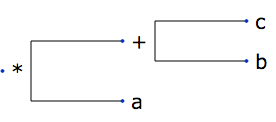

In [3]:
# Arbre équivalent à l'expression (a*(b+c))

R        = t = Noeud('*')
t.gauche = a = Noeud('a')
t.droite = p = Noeud('+')
p.gauche = b = Noeud('b')
p.droite = c = Noeud('c')
h.afficher_arbre_binaire(R)

## Notation infixée

Elle correspond à la manière usuelle d'écrire les expressions arithmétiques. 

Les **opérandes** d'une **opération** entourent son symbole. 

Cela correspond donc à un **parcours symétrique** de l'arbre.

In [4]:
def expr_infixe(R):
    assert(R != None)
    str = ""
    if R.gauche: str += "(" + expr_infixe(R.gauche)
    str += "{}".format(R.donnee)
    if R.droite: str += expr_infixe(R.droite) + ")"
    return str

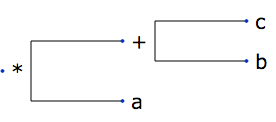

In [5]:
h.afficher_arbre_binaire(R)

# Quelle est l'expression infixe correspondante?

In [6]:
infixe = expr_infixe(R); print(infixe)

(a*(b+c))


## Notation pré-fixée

Cette notation correspond au parcours pré-ordonné de l'arbre de l'expression.

Elle est aussi connue sous le nom de **notation de [Łukasiewicz](https://fr.wikipedia.org/wiki/Jan_Łukasiewicz)** ou **notation polonaise**. 

In [7]:
def expr_prefixe(R):
    str = ""
    if R:
        str += "{} ".format(R.donnee)
        str += expr_prefixe(R.gauche)
        str += expr_prefixe(R.droite)
    return str

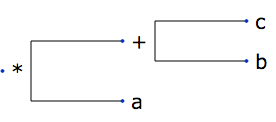

In [8]:
h.afficher_arbre_binaire(R)

# Quelle est l'expression pré-fixée correspondante?

In [9]:
prefixe = expr_prefixe(R); print(prefixe)

* a + b c 


Elle ne nécessite pas de parenthèse dès lors que chaque opérateur a un nombre fixe d'opérandes.

Elle est utilisée (avec parentèses) pour la syntaxe du langage [Common Lisp](https://en.wikipedia.org/wiki/Common_Lisp#Syntax).

## Notation post-fixée

Elle correspond au parcours post-ordonné de l'arbre de l'expression. 

Aussi connue sous le nom de **notation polonaise inverse**

In [10]:
def expr_postfixe(R):
    str = ""
    if R:
        str += expr_postfixe(R.gauche)
        str += expr_postfixe(R.droite)
        str += "{} ".format(R.donnee)
    return str

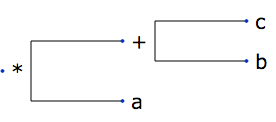

In [11]:
h.afficher_arbre_binaire(R)

# Quelle est l'expression post-fixée correspondante?

In [12]:
postfixe = expr_postfixe(R); print(postfixe)

a b c + * 


Elle présente l'avantage par rapport à la notation infixe de toujours disposer des opérandes quand on atteint le symbole de l'opérateur, ce qui permet de l'évaluer directement.

Elle est utilisée par exemple dans les [calculatrices HP](https://fr.wikipedia.org/wiki/Calculatrices_HP) ou dans le langage [PostScript](https://fr.wikipedia.org/wiki/PostScript). 

## Expression → arbre

Il est évidemment possible d'effectuer l'opération inverse, qui convertit une expression préfixe, postfixe ou infixe en arbre. 

On lit depuis un flux de charactères en entrée et on retourne la racine de l'arbre généré. 

On utilise la fonction annexe suivante pour simplifier

In [13]:
def est_un_operateur(c):
    return "+-*/".find(c) != -1

Le flux d'un expression préfixe contient 

* pour les opérateurs `+-*/`: la racine, puis le sous-arbre gauche, puis le sous-arbre droit


* pour les autres symboles: une feuille de l'arbre 

Cela définit les cas général et trivial de la récursion

In [14]:
from io import StringIO
def prefixe_vers_arbre_str(chaine):
    s = chaine.replace(" ","")
    return prefixe_vers_arbre(StringIO(s))

def prefixe_vers_arbre(flux):
    c = flux.read(1)
    R = Noeud(c)
    if est_un_operateur(c):
        R.gauche = prefixe_vers_arbre(flux)
        R.droite = prefixe_vers_arbre(flux)
    return R

In [15]:
prefixe = "* - + a b / c d + e f"

# Quel est l'arbre correspondant ? 
# Quel est l'expression infixe correspondante ?

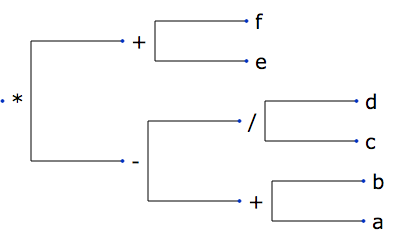

(((a+b)-(c/d))*(e+f))


In [16]:
R2 = prefixe_vers_arbre_str(prefixe)
h.afficher_arbre_binaire(R2)
print(expr_infixe(R2))

## Infixe → arbre 

On utilise le même prototype pour la conversion infixe vers arbre

Le flux d'un expression infixe contient soit 

* une parenthèse `(`
    * suivie d'une expression infixe
    * suivie d'un opérateur `+-*/`
    * suivie d'une expression infixe
    * suivie d'une parenthèse `)`


* une feuille de l'arbre

Cela définit les cas général et trivial de la récursion

In [17]:
def infixe_vers_arbre_str(chaine):
    s = chaine.replace(" ","")
    return infixe_vers_arbre(StringIO(s))

def infixe_vers_arbre(flux):
    c = flux.read(1)
    if c == "(":
        R = Noeud("?")
        R.gauche = infixe_vers_arbre(flux) 
        R.donnee = flux.read(1); 
        assert(est_un_operateur(R.donnee))
        R.droite = infixe_vers_arbre(flux)
        c = flux.read(1);        
        assert(c == ")")
    else:
        R = Noeud(c)
    return R

In [18]:
infixe = "( (a*b) + ( (c*d) + (e/f) ) )"
# Quel est l'arbre correspondant ? 
# Quel est l'expression postfixe correspondante ?

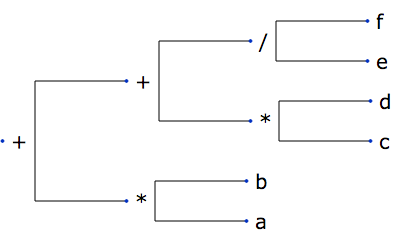

a b * c d * e f / + + 


In [19]:
R3 = infixe_vers_arbre_str(infixe)
h.afficher_arbre_binaire(R3)
print(expr_postfixe(R3))

## Postfixe → arbre

Cette conversion ne peut pas utiliser le même principe. Notamment parce qu'il n'y a pas de fin naturelle à une expression post-fixe. Il faut donc lire jusque la fin du flux.

Par contre, on peut utiliser une simple pile. 

In [20]:
def postfixe_vers_arbre_str(chaine):
    s = chaine.replace(" ","")
    return postfixe_vers_arbre(StringIO(s))

def postfixe_vers_arbre(flux):
    Pile = []
    c = flux.read(1)
    while c != "":
        R = Noeud(c)
        if est_un_operateur(c): 
            R.droite = Pile.pop()
            R.gauche = Pile.pop()
        Pile.append(R)
        c = flux.read(1)
    return R

In [21]:
postfixe = "a b - c d e + * +"
# Quel est l'arbre correspondant ? 
# Quel est l'expression infixe correspondante ?

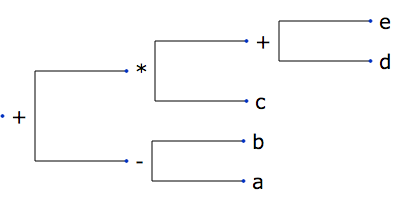

((a-b)+(c*(d+e)))


In [22]:
R4 = postfixe_vers_arbre_str(postfixe)
h.afficher_arbre_binaire(R4)
print(expr_infixe(R4))

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>